In [1]:
from math import *
import numpy as np
import pylab as plt
%matplotlib inline

In [46]:
(47.4)/(1.5*10**8)

3.1599999999999997e-07

In [52]:
#first set up all constants a2nd initial conditions
pos_sun = np.array([0, 0])
pos_earth = np.array([1, 0])
pos_jup = np.array([5.2, 0])
pos_mars = np.array([1.5, 0])
pos_sat = np.array([9.6, 0])
pos_merc = np.array([0.39, 0])
vel_earth = np.array([0, 2e-7])
vel_sun = np.array([0, 0])
vel_jup = np.array([0, 8.733333333333333e-08])
vel_mars = np.array([0, 1.6066666666666668e-07])
vel_sat = np.array([0, 6.4e-08])
vel_merc = ([0, 3.1599999999999997e-07])
mass_earth = 5.972*10**24
mass_sun = 1.989*10**30
mass_jup = 1.898*10**27
mass_mars = 6.39*10**23
mass_sat = 5.683*10**26
mass_merc = 3.285*10**23 
G = 1.976*10**-44

position = np.array([pos_sun, pos_earth, pos_jup, pos_mars, pos_sat, pos_merc])
velocity = np.array([vel_sun, vel_earth, vel_jup, vel_mars, vel_sat, vel_merc])
mass = np.array([mass_sun, mass_earth, mass_jup, mass_mars, mass_sat, mass_merc])

In [53]:
def computeAccel(x,m):
    '''this method computes the acceleration on the bodies
 
    Parameters
    -----------
    x : array of positions for all bodies
    m : array of masses of all bodies
    
    Returns 
    ---------
    a : array of the acceleration of all bodies
    '''
    a=np.zeros_like(x)
    nbodies = x.shape[0]
    for i in range(nbodies):
        for j in range(nbodies):
            r=x[j]-x[i]
            if i !=j:
                a[i]=a[i]+r*G*m[j]/pow(np.vdot(r,r),1.5)
    return a

In [54]:
def leapFrog(x, v, a, m, dt):
    """ Performs one leap frog step
    
    Parameters
    ------------
    x : array of positions for all bodies
    v : array of velocities for all bodies
    a : array of accelerations for all bodies
    m : array of masses of all bodies
    dt : the timestep
    
    Returns
    --------
    x : array of updated positions for all bodies
    v : array of updated velocities for all bodies
    a : array of updated accelerations for all bodies
    """
    v = v + 0.5*dt*a
    x = x + dt*v
    a = computeAccel(x, m)
    v = v + 0.5*dt*a
    return x,v,a

In [55]:
#use this cell to plot the results
max_time = 28*365*24*60*60
dt = 1*24*60*60
time = 0
acceleration = computeAccel(position, mass)
each_position = []
while time <= max_time:
    position, velocity, acceleration = (leapFrog(position, velocity, acceleration, mass, dt))
    time = time + dt
    each_position.append(position)
print(position, velocity, acceleration)
each_position = np.array(each_position)

[[  7.40922546e-03   8.67364176e-02]
 [  7.07223027e-01   8.08738015e-01]
 [ -2.37997965e+00   4.77127743e+00]
 [ -1.44770441e+00   2.98766035e-02]
 [  8.99043291e+00  -3.24215337e+00]
 [  8.85418761e-02  -2.94428081e-01]] [[  6.75758438e-11   1.21653600e-10]
 [ -1.40988584e-07   1.40379746e-07]
 [ -7.71095248e-08  -3.86380590e-08]
 [  6.43363486e-09  -1.65243804e-07]
 [  2.23151386e-08   6.00786266e-08]
 [  3.09601894e-07   6.49099490e-08]] [[ -4.17097900e-19   1.20800408e-18]
 [ -2.70566351e-14  -2.79125388e-14]
 [  6.45601565e-16  -1.26673990e-15]
 [  1.85195040e-14   7.25228234e-16]
 [ -4.01718515e-16   1.48920181e-16]
 [ -5.38787036e-14   2.53123717e-13]]


In [56]:
#print(each_position)

In [57]:
sunx = each_position[::, 0, 0]
suny = each_position[::, 0, 1]
earthx = each_position[::100, 1, 0]
earthy = each_position[::100, 1, 1]
jupx = each_position[::100, 2, 0]
jupy = each_position[::100, 2, 1]
marsx = each_position[::100, 3, 0]
marsy = each_position[::100, 3, 1]
satx = each_position[::100, 4, 0]
saty = each_position[::100, 4, 1]
mercx = each_position[::, 5, 0]
mercy = each_position[::, 5, 1]

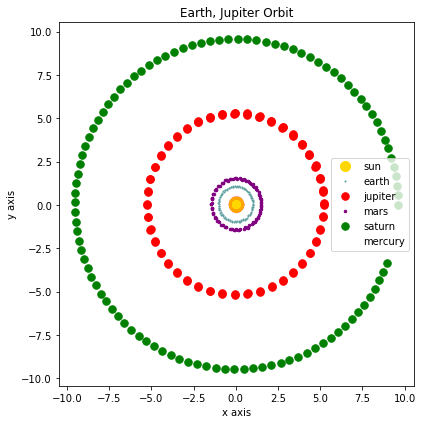

In [63]:
fig = plt.figure(figsize= (6, 6))
plt.plot(sunx, suny, ".", ms = 20, color = "gold", label = "sun")
plt.plot(earthx, earthy, ".", ms = 2, color = "cadetblue", label = "earth")
plt.plot(jupx, jupy, ".", ms = 15, color = "red", label = "jupiter")
plt.plot(marsx, marsy, ".", ms = 5, color = "purple", label = "mars")
plt.plot(satx, saty, ".", ms = 15, color = "green", label = "saturn")
plt.plot(mercx, mercy, ".", ms = 0.05, color = "orange", label = "mercury")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Earth, Jupiter Orbit")
plt.savefig("Earth's Orbit")
plt.tight_layout()
plt.show()

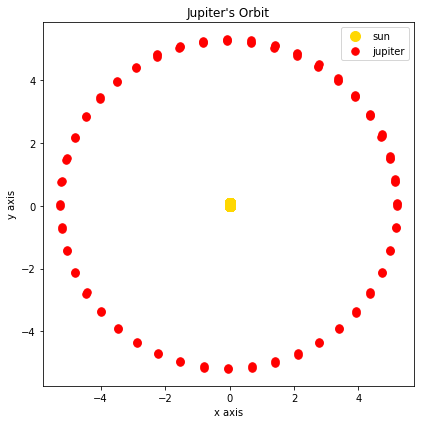

In [64]:
fig = plt.figure(figsize= (6, 6))
plt.plot(sunx, suny, ".", ms = 20, color = "gold", label = "sun")
plt.plot(jupx, jupy, ".", ms = 15, color = "red", label = "jupiter")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Jupiter's Orbit")
plt.savefig("Jupiter's Orbit")
plt.tight_layout()
plt.show()

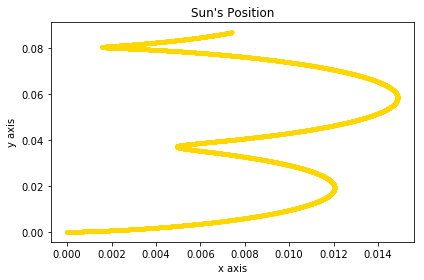

In [76]:
fig = plt.figure()
plt.plot(sunx, suny, ".", color = "gold" )
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Sun's Position")
plt.savefig("Sun's Positions")
plt.tight_layout()
plt.show()

In [67]:
earthx2 = each_position[::, 1, 0]
earthy2 = each_position[::, 1, 1]
jupx2 = each_position[::, 2, 0]
jupy2 = each_position[::, 2, 1]
marsx2 = each_position[::, 3, 0]
marsy2 = each_position[::, 3, 1]
satx2 = each_position[::, 4, 0]
saty2 = each_position[::, 4, 1]
mercx2 = each_position[::, 5, 0]
mercy2 = each_position[::, 5, 1]

In [70]:
scale_jup = np.log10(10*(mass_jup/mass_merc))
scale_sat = np.log10(10*(mass_sat/mass_merc))
scale_mars = np.log10(10*(mass_mars/mass_merc))
scale_earth = np.log10(10*(mass_earth/mass_merc))
scale_merc = np.log10(10*(mass_merc/mass_merc))

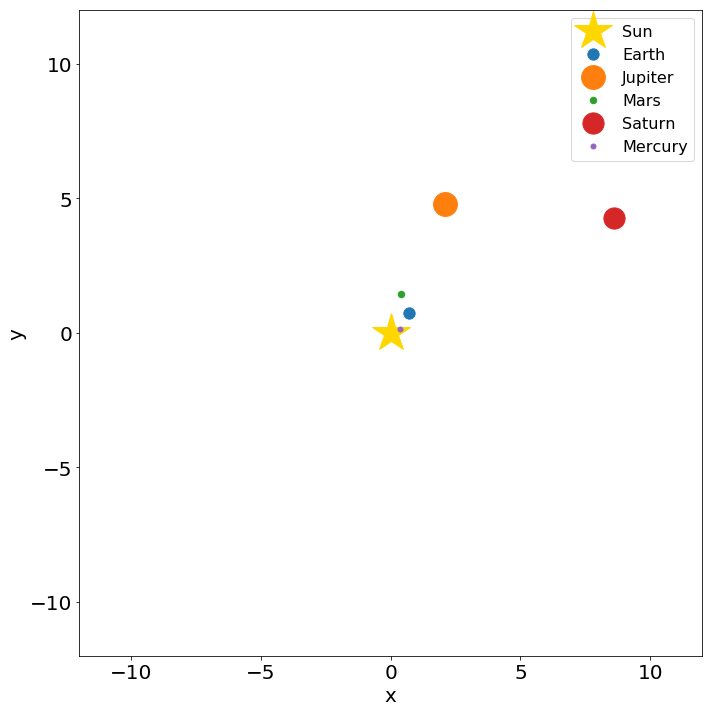

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
num = 800 #The amount of days that we want the animation to represent 
# initialization function: plot the background of each frame
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    l3.set_data([], [])
    l4.set_data([], [])
    l5.set_data([], [])
    l6.set_data([], [])
    return l1,l2,l3,l4,l5,l6
#whatever number we our up to in num, plot that data 
def update_line(num, data1, data2, data3, data4, data5, data6, line1, line2, line3, line4, line5, line6):
    line1.set_data(data1[..., num])
    line2.set_data(data2[..., num])
    line3.set_data(data3[..., num])
    line4.set_data(data4[..., num])
    line5.set_data(data5[..., num])
    line6.set_data(data6[..., num])
    return line1, line2, line3, line4, line5, line6
fig1 = plt.figure(figsize=(10,10))
#setting the planet's x and y data to a variable 
data1 = np.array([sunx, suny])
data2 = np.array([earthx2, earthy2])
data3 = np.array([jupx2, jupy2])
data4 = np.array([marsx2, marsy2])
data5 = np.array([satx2, saty2])
data6 = np.array([mercx2, mercy2])
#plottting, labeling, setting the size, and marker for the planets 
l1, = plt.plot([], [], '*', ms = 40, color = "gold", label = "Sun") #for plotting your sun
l2, = plt.plot([], [], '.', ms = scale_earth*10, label = "Earth") #for plottting your earth
l3, = plt.plot([], [], '.', ms = scale_jup*10, label = "Jupiter") #for plotting your jupiter
l4, = plt.plot([], [], '.', ms = scale_mars*10, label = "Mars") #for plotting your mars
l5, = plt.plot([], [], '.', ms = scale_sat*10, label = "Saturn") #for plotting your saturn
l6, = plt.plot([], [], '.', ms = scale_merc*10, label = "Mercury") #for plotting your mercury
arguas=(data1,data2,data3,data4,data5,data6,l1,l2,l3,l4,l5,l6) #the arguments your update_line function needs
#setting the labels and limits to our graph 
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.legend(fontsize=16)
plt.gca().tick_params(labelsize=20)
plt.tight_layout()

line_ani = animation.FuncAnimation(fig1, update_line, num, init_func=init, fargs=arguas,interval=10, blit=True)
line_ani.save('allmov2.mp4')